## Visualise data in Maps using GeoPandas
More often than not, while performing an EDA, we are faced with a situation to display information in relation to the geographical locations. For example, for a COVID 19 dataset, one would want to display the number of cases in various areas. This is where the python library GeoPandas comes to our rescue. 

The [Olympics 2021](https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo) dataset is used to illustrate the usage of GeoPandas


### Common functions

In [1]:
import matplotlib.pyplot as plt
def annotate(ax, title):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
        ax.set_title(title)

from mpl_toolkits.axes_grid1 import make_axes_locatable
def addColorbar():
    fig, ax = plt.subplots(1, 1, figsize=(20, 16))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad="0.5%")
    return ax, cax

### Read teams dataset

In [2]:
import pandas as pd

df_teams = pd.read_excel("data/Teams.xlsx")
print(df_teams.info(),"\n")
print(df_teams.head(),"\n")
print(f"Countries: {len(df_teams['NOC'].unique().tolist())}, Disciplines: {len(df_teams['Discipline'].unique().tolist())}, Events: {len(df_teams['Event'].unique().tolist())}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB
None 

      Name      Discipline                         NOC  Event
0  Belgium  3x3 Basketball                     Belgium    Men
1    China  3x3 Basketball  People's Republic of China    Men
2    China  3x3 Basketball  People's Republic of China  Women
3   France  3x3 Basketball                      France  Women
4    Italy  3x3 Basketball                       Italy  Women 

Countries: 84, Disciplines: 20, Events: 36


- No missing values
- Countries 84 Discipline 20

The teams dataset has the team name, discipline, NOC (country) and event columns. We will be using only the NOC and discipline columns in this exercise.

#### How many disciplines each country participated in?

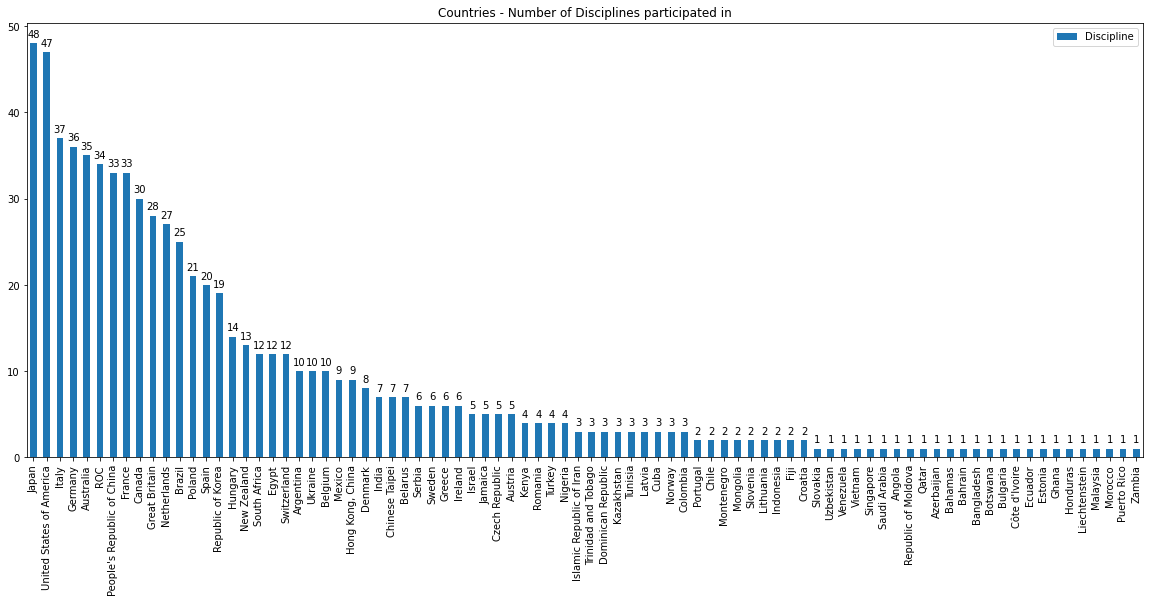

In [3]:
df_teams_countries_disciplines = df_teams.groupby(by="NOC").agg({'Discipline':'count'}).reset_index().sort_values(by='Discipline', ascending=False)
ax = df_teams_countries_disciplines.plot.bar(x='NOC', xlabel = '', figsize=(20,8))
annotate(ax, "Countries - Number of Disciplines participated in")

#### How many countries each Discipline had participants from? Which countries participated in the least participated disciplines?

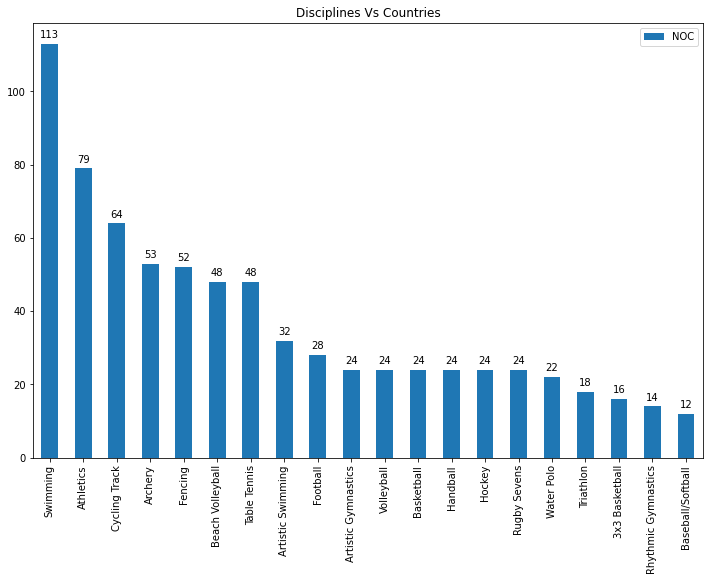

In [4]:
df_discipline_countries = df_teams.groupby(by='Discipline').agg({'NOC':'count'}).sort_values(by='NOC', ascending=False)
ax = df_discipline_countries.plot.bar(xlabel = '', figsize=(12, 8))
annotate(ax, "Disciplines Vs Countries")

In [5]:
least_participated_disciplines = df_discipline_countries[df_discipline_countries['NOC']<13].index.tolist()
print(least_participated_disciplines)
df_teams_least_disciplines = df_teams[df_teams['Discipline'].isin(least_participated_disciplines)].groupby(by=['NOC','Discipline']).agg({'Discipline':'count'})
df_teams_least_disciplines.groupby(by=['NOC']).agg({'Discipline':'count'}).sort_values(by='Discipline', ascending=False)

['Baseball/Softball']


,Discipline
NOC,
Australia,1
Canada,1
Dominican Republic,1
Israel,1
Italy,1
Japan,1
Mexico,1
Republic of Korea,1
United States of America,1


### Load the world geo dataset

“naturalearth_lowres” is a basemap provided with geopandas which we loaded.

In [6]:
import geopandas as gpd

df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(f"Type of df_world: {type(df_world)} Active geometry: {df_world.geometry.name}\n")
print(f"Value counts of geometry column: {df_world.geometry.geom_type.value_counts()}\n")
df_world.head()

Type of df_world: <class 'geopandas.geodataframe.GeoDataFrame'> Active geometry: geometry

Value counts of geometry column: Polygon         148
MultiPolygon     29
dtype: int64



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


df_world is of type GeoDataFrame with continent, (country) name and geometry (of country area) columns. geometry is of type GeoSeries and is the active geometry with country area represented in Polygon and MultiPolygon types.

<AxesSubplot:>

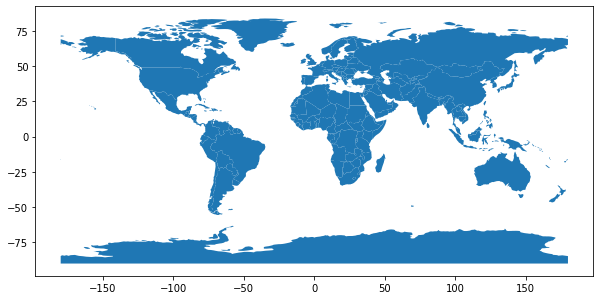

In [7]:
df_world.plot(figsize=(10,6))

### Fix the discrepancies in the country names

In [8]:
geopandas_countries = set(df_world['name'].unique().tolist())
teams_countries = set(df_teams['NOC'].unique().tolist())
print("geopandas_countries", len(geopandas_countries), "teams_countries", len(teams_countries))
print("Countries in teams but not found in the geo dataset")
diff_country_names = list(teams_countries-geopandas_countries); diff_country_names
diff_country_names

geopandas_countries 177 teams_countries 84
Countries in teams but not found in the geo dataset


["People's Republic of China",
 'Chinese Taipei',
 'Dominican Republic',
 'ROC',
 'Bahrain',
 'Hong Kong, China',
 'Great Britain',
 'Islamic Republic of Iran',
 'Republic of Korea',
 'Republic of Moldova',
 'Czech Republic',
 'Singapore',
 'Liechtenstein']

In [9]:
subs = ["Bah", "Taipei", "Czech", "Domi", "Great", "Britain", "Hong", "Iran", "China", "Liech", "Korea", "ROD", "Mol", "Sing"]
for country in geopandas_countries:
    for sub in subs:
        if sub in country:
            print(sub, "- ", country)

Korea -  North Korea
Mol -  Moldova
Bah -  Bahamas
Czech -  Czechia
China -  China
Domi -  Dominican Rep.
Korea -  South Korea
Iran -  Iran


In [10]:
team_to_geopandas_countries = { "People's Republic of China" : "China",
                                'Republic of Korea': 'South Korea',
                                'Republic of Moldova':'Moldova',
                                'Czech Republic':'Czechia',
                                'Islamic Republic of Iran':'Iran',
                                'Dominican Republic':'Dominican Rep.',
                                'ROC' : 'Russia',
                                'Great Britain': 'United Kingdom'}

# Countries that are not present in the geopandas. So ignore these
'''
    'Great Britain',
    'Singapore',
    'Bahrain',
    'Liechtenstein',
    'Hong Kong, China',
    'Chinese Taipei'
'''

"\n    'Great Britain',\n    'Singapore',\n    'Bahrain',\n    'Liechtenstein',\n    'Hong Kong, China',\n    'Chinese Taipei'\n"

In [11]:
print(df_world[df_world['name'].str[0]=='B']['name'])
print(df_world[df_world['name'].str[0]=='H']['name'])
print(df_world[df_world['name'].str[0]=='L']['name'])
print(df_world[df_world['name'].str[0]=='R']['name'])
print(df_world[df_world['name'].str[:2]=='Si']['name'])
print(df_world[df_world['name'].str[0]=='U']['name'])

19              Bahamas
29               Brazil
30              Bolivia
39               Belize
49             Botswana
54                Benin
65         Burkina Faso
75              Burundi
99           Bangladesh
100              Bhutan
111             Belarus
122            Bulgaria
129             Belgium
149              Brunei
170    Bosnia and Herz.
Name: name, dtype: object
16        Haiti
36     Honduras
115     Hungary
Name: name, dtype: object
26        Lesotho
63        Liberia
77        Lebanon
92           Laos
118     Lithuania
119        Latvia
128    Luxembourg
164         Libya
Name: name, dtype: object
18      Russia
117    Romania
169     Rwanda
Name: name, dtype: object
64    Sierra Leone
Name: name, dtype: object
4      United States of America
6                    Uzbekistan
28                      Uruguay
84         United Arab Emirates
112                     Ukraine
143              United Kingdom
168                      Uganda
Name: name, dtype: object


In [12]:
for country in team_to_geopandas_countries.keys():
    print(df_teams[df_teams['NOC'] == country]['NOC'].tolist()[0])

People's Republic of China
Republic of Korea
Republic of Moldova
Czech Republic
Islamic Republic of Iran
Dominican Republic
ROC
Great Britain


In [13]:
print("Before", list(set(df_teams['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))
for country in team_to_geopandas_countries.keys():
    df_teams.loc[df_teams['NOC'] == country, 'NOC'] = team_to_geopandas_countries[country]
print("After", list(set(df_teams['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))

Before [] ["People's Republic of China", 'Dominican Republic', 'ROC', 'Great Britain', 'Islamic Republic of Iran', 'Republic of Korea', 'Republic of Moldova', 'Czech Republic']
After ['Czechia', 'Dominican Rep.', 'United Kingdom', 'Iran', 'Russia', 'South Korea', 'Moldova', 'China'] []


In [14]:
'''df_teams_least_disciplines.rename(columns={'Discipline':'Count'}, inplace=True)
df_teams_least_disciplines = df_teams_least_disciplines.reset_index()
df_teams_least_disciplines'''

"df_teams_least_disciplines.rename(columns={'Discipline':'Count'}, inplace=True)\ndf_teams_least_disciplines = df_teams_least_disciplines.reset_index()\ndf_teams_least_disciplines"

In [15]:
'''countries = df_teams_least_disciplines['NOC'].tolist()
print("Before", list(set(df_teams_least_disciplines['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams_least_disciplines['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))
for country in countries:
    print(df_teams_least_disciplines[df_teams_least_disciplines['NOC'] == country]['NOC'].tolist()[0])
    if country in team_to_geopandas_countries.keys():
        df_teams_least_disciplines.loc[df_teams_least_disciplines['NOC'] == country, 'NOC'] = team_to_geopandas_countries[country]
print("After", list(set(df_teams_least_disciplines['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams_least_disciplines['NOC'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))'''

'countries = df_teams_least_disciplines[\'NOC\'].tolist()\nprint("Before", list(set(df_teams_least_disciplines[\'NOC\'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams_least_disciplines[\'NOC\'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))\nfor country in countries:\n    print(df_teams_least_disciplines[df_teams_least_disciplines[\'NOC\'] == country][\'NOC\'].tolist()[0])\n    if country in team_to_geopandas_countries.keys():\n        df_teams_least_disciplines.loc[df_teams_least_disciplines[\'NOC\'] == country, \'NOC\'] = team_to_geopandas_countries[country]\nprint("After", list(set(df_teams_least_disciplines[\'NOC\'].unique().tolist()).intersection(team_to_geopandas_countries.values())), list(set(df_teams_least_disciplines[\'NOC\'].unique().tolist()).intersection(team_to_geopandas_countries.keys())))'

### Merge teams and world datasets to create  a new dataset

In [16]:
df_world_teams = df_world.merge(df_teams_countries_disciplines, how="left", left_on=['name'], right_on=['NOC'])
print("Type of DataFrame : ", type(df_world_teams), df_world_teams.shape[0])
df_world_teams.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,NOC,Discipline
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,30.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,47.0


In [17]:
print(len(df_world_teams['NOC'].unique()))
df_world_teams['NOC'].unique()

72


array(['Fiji', nan, 'Canada', 'United States of America', 'Kazakhstan',
       'Uzbekistan', 'Indonesia', 'Argentina', 'Chile', 'Kenya',
       'Bahamas', 'Norway', 'South Africa', 'Mexico', 'Brazil',
       'Colombia', 'Honduras', 'Venezuela', 'France', 'Ecuador',
       'Puerto Rico', 'Jamaica', 'Cuba', 'Botswana', 'Nigeria', 'Ghana',
       "Côte d'Ivoire", 'Zambia', 'Angola', 'Israel', 'Tunisia', 'Qatar',
       'Vietnam', 'Mongolia', 'India', 'Bangladesh', 'Sweden', 'Belarus',
       'Ukraine', 'Poland', 'Austria', 'Hungary', 'Romania', 'Lithuania',
       'Latvia', 'Estonia', 'Germany', 'Bulgaria', 'Greece', 'Turkey',
       'Croatia', 'Switzerland', 'Belgium', 'Netherlands', 'Portugal',
       'Spain', 'Ireland', 'New Zealand', 'Australia', 'Italy', 'Denmark',
       'Azerbaijan', 'Malaysia', 'Slovenia', 'Slovakia', 'Japan',
       'Saudi Arabia', 'Morocco', 'Egypt', 'Serbia', 'Montenegro',
       'Trinidad and Tobago'], dtype=object)

Note:  df_world_teams will have some entries with NOC and Discipline as NaN. This (merge on left instead of right) has been done intentionally so that we also have the countries that have not participated.

### 1. Add map with only borders

As a first step, let's plot the basic map - world with boundary only. In the next steps we will colour the countries that we are interested in.

<AxesSubplot:>

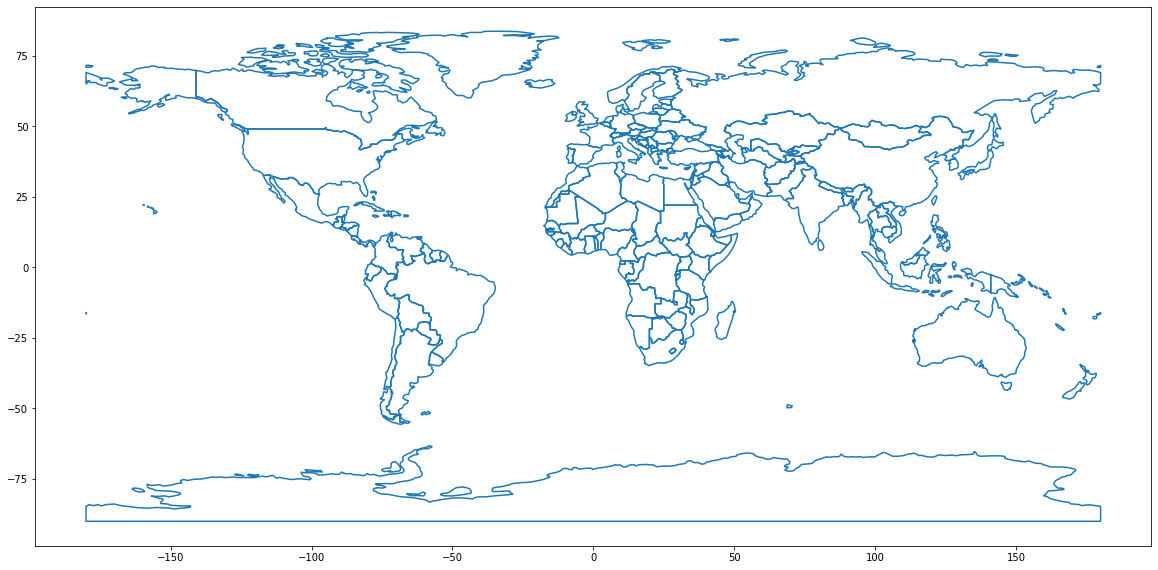

In [18]:
df_world["geometry"].boundary.plot(figsize=(20,16))

### 2. Color the countries based on the number of disciplines they participated in

Next, let us colour the countries that have participated in olympics with the darkness of the colour based on the number of disciplines the country has participated in. The more disciplines the country participated in, the darker the shade and vice versa. Choropleth maps colour the regions/polygons in relation to a data variable.

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

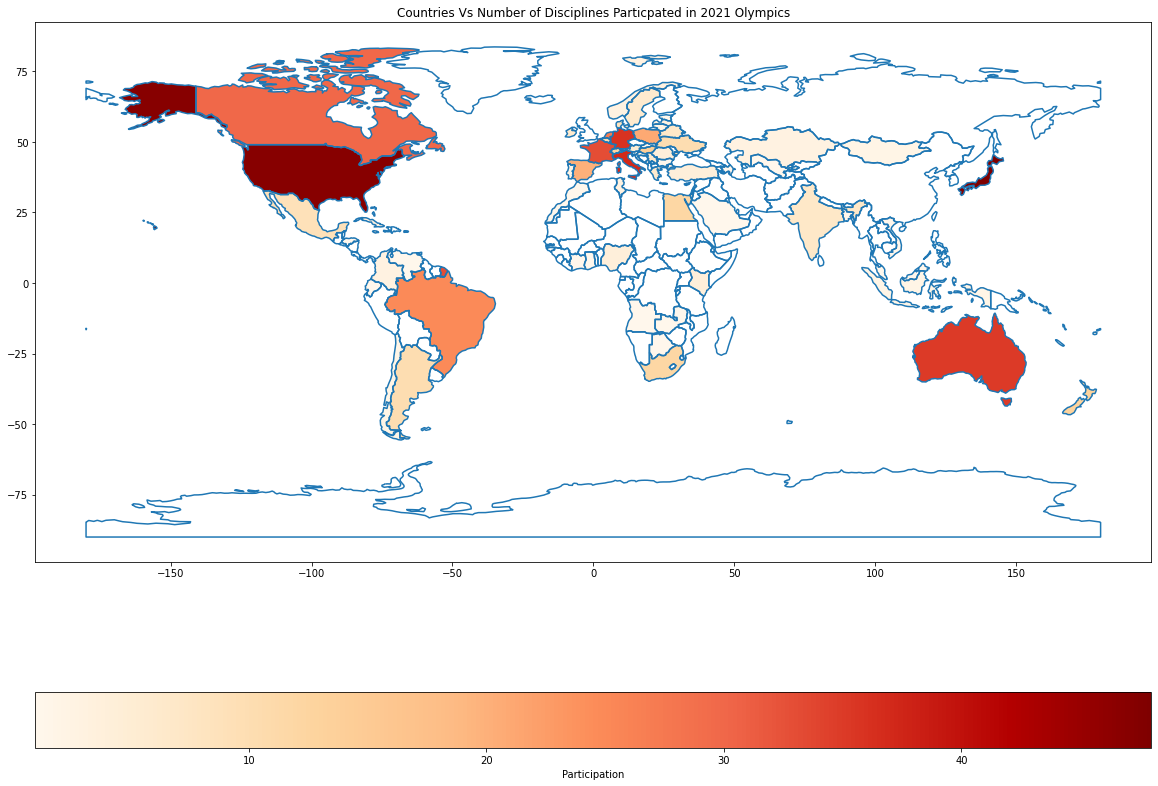

In [19]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
df_world_teams.plot( column="Discipline", ax=ax, cmap='OrRd', 
                     legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})
ax.set_title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

where
- ax is the axes on which to draw the map
- cmap is the name of the colormap 
- legend & legend_kwds control the display of the legend.

Based on the shading, we can quickly see that Japan, America, Italy, Germany and Australia are the countries that have participated in most disciplines.

Notice that the legend at the bottom does not look that great. Let's modify df_world_teams.plot to make the visualisation more presentable.

### 3. Make the colorbar look better

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

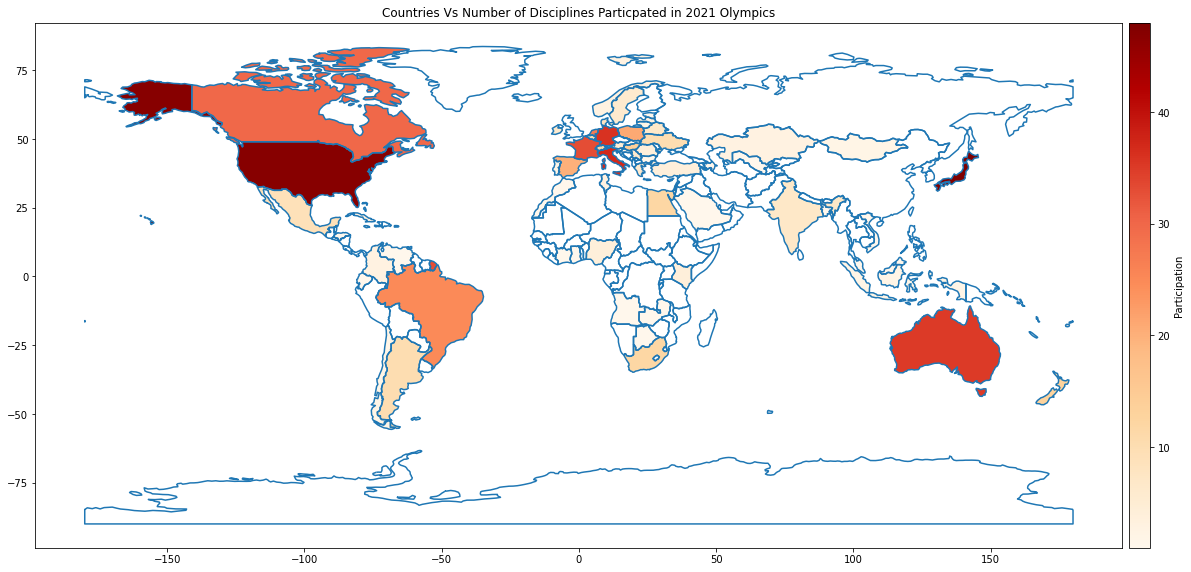

In [20]:
ax, cax = addColorbar()
df_world["geometry"].boundary.plot(ax=ax, figsize=(20,16))
df_world_teams.plot(column="Discipline", ax=ax, cax=cax, cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation"})
ax.set_title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

Isn't this visualisation a lot neater?

### 4. Mark the countries that didn't participate in grey

Now what about the countries that didn't participate? All the countries that are not shaded (i.e. in white colour) are the ones that did not participate. But let's make that more obvious by shading these countries in grey. We can use missing_kwds with just a plain colour or with colour and pattern for that.

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

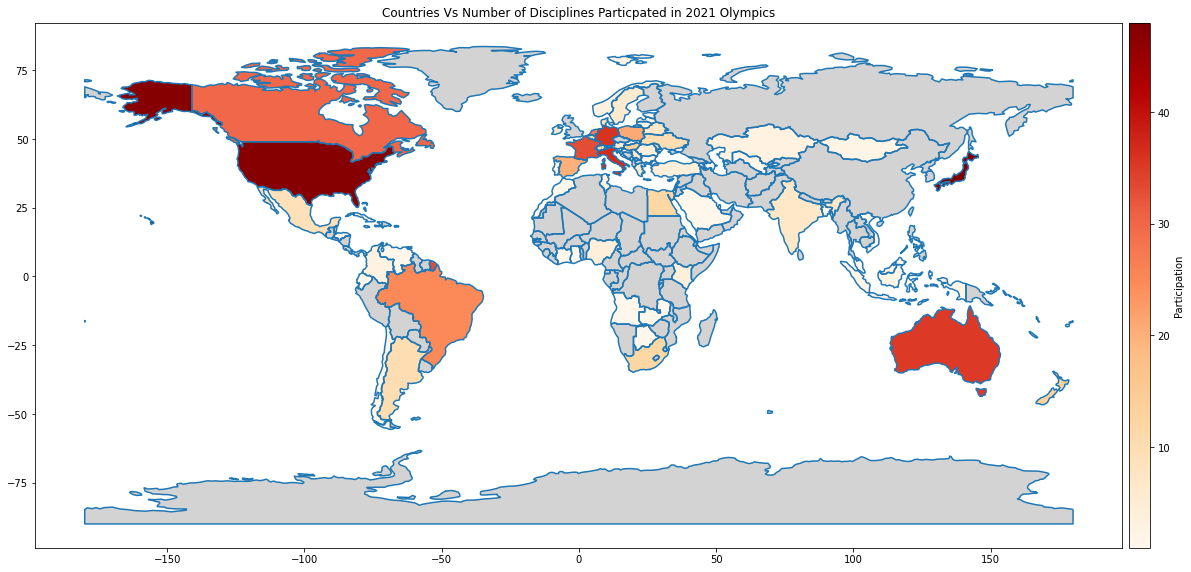

In [21]:
ax, cax = addColorbar()
df_world["geometry"].boundary.plot(ax=ax,figsize=(20,16))
df_world_teams.plot(column="Discipline", ax=ax,  cax=cax, cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation"},  
                    missing_kwds={'color': 'lightgrey'})
ax.set_title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

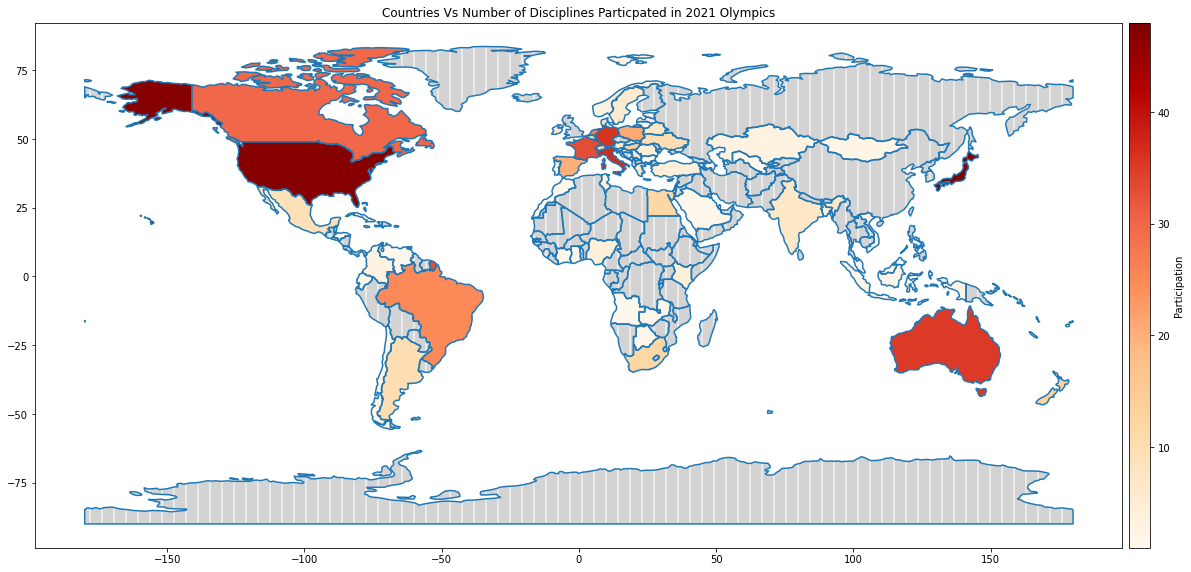

In [22]:
ax, cax = addColorbar()
df_world["geometry"].boundary.plot(ax=ax, figsize=(20,16))
df_world_teams.plot(column= 'Discipline', ax=ax,  cax=cax, cmap='OrRd', 
                    legend=True, legend_kwds={"label": "Participation"}, 
                    missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})
ax.set_title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

### 5. Mark the countries participated in least participated disciplines

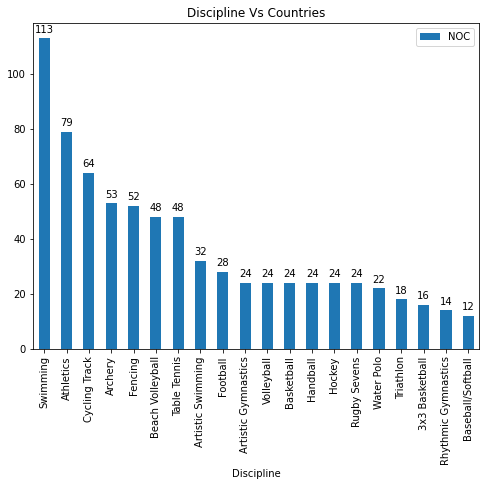

In [23]:
df_discipline_countries = df_teams.groupby(by='Discipline').agg({'NOC':'count'}).sort_values(by='NOC', ascending=False)
ax = df_discipline_countries.plot.bar(figsize=(8, 6))
annotate(ax, "Discipline Vs Countries")

So Baseball/Softball is the discipline in which least number of countries (12) participated. Now which countries participated in this discipline? Let's find out. 

For this, firstly create a dataset with only the countries participated in the least participate discipline and then merge this dataset df_teams_least_participated_disciplines and df_world and then calculate the centroids. 

In [24]:
countries_in_least_participated_disciplines = df_discipline_countries[df_discipline_countries['NOC']<13].index.tolist()
print(least_participated_disciplines)
df_teams_least_participated_disciplines = df_teams[df_teams['Discipline'].isin(countries_in_least_participated_disciplines)].groupby(by=['NOC','Discipline']).agg({'Discipline':'count'})
df_teams_least_participated_disciplines.groupby(by=['NOC']).agg({'Discipline':'count'}).sort_values(by='Discipline', ascending=False)

['Baseball/Softball']


,Discipline
NOC,
Australia,1
Canada,1
Dominican Rep.,1
Israel,1
Italy,1
Japan,1
Mexico,1
South Korea,1
United States of America,1


So Australia, Canada, Dominican Rep. and others have participated in the least participated discipline.

In [25]:
df_world_teams_least_participated_disciplines = df_world.merge(df_teams_least_participated_disciplines, how="right", left_on=['name'], right_on=['NOC'])
df_world_teams_least_participated_disciplines['centroid'] = df_world_teams_least_participated_disciplines.centroid

/var/folders/6d/t1t1r89n1q95d2ztv2qstyb40000gr/T/ipykernel_32983/2420397421.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_world_teams_least_participated_disciplines['centroid'] = df_world_teams_least_participated_disciplines.centroid


In [26]:
print("Type of DataFrame : ", type(df_world_teams_least_participated_disciplines),df_world_teams_least_participated_disciplines.shape[0])
df_world_teams_least_participated_disciplines.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 9


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Discipline,centroid
0,23232413,Oceania,Australia,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",1,POINT (134.50278 -25.73065)
1,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1,POINT (-98.14238 61.46908)
2,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",1,POINT (-70.46236 18.88449)
3,8299706,Asia,Israel,ISR,297000.0,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",1,POINT (35.00385 31.48492)
4,62137802,Europe,Italy,ITA,2221000.0,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",1,POINT (12.14079 42.75118)


Text(0.5, 1.0, 'Countries Vs Number of Disciplines Particpated in 2021 Olympics')

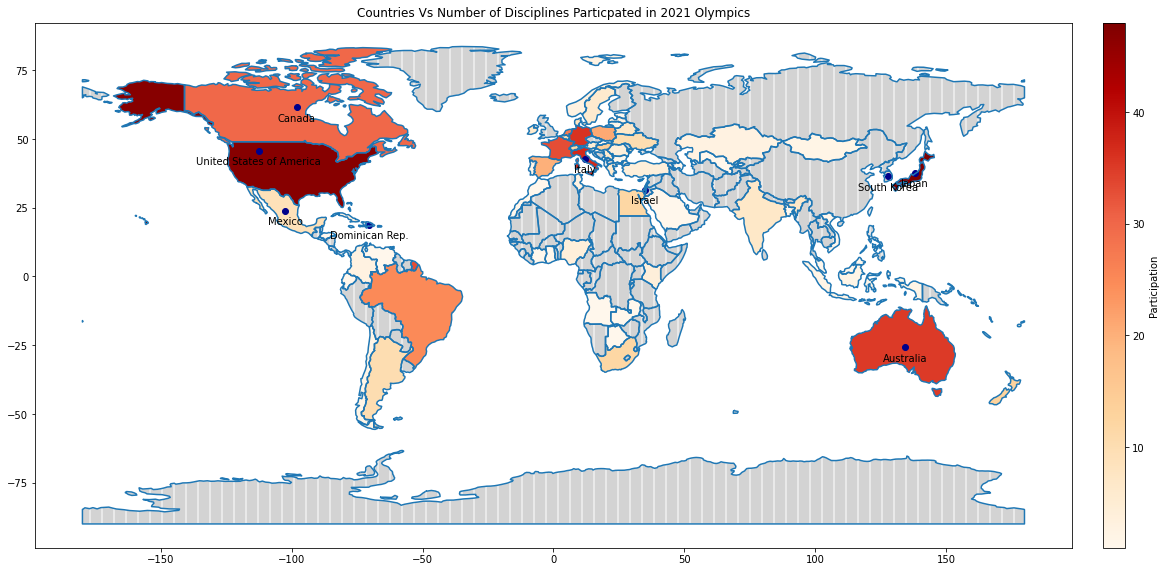

In [27]:
ax, cax = addColorbar()
df_world["geometry"].boundary.plot(ax=ax, figsize=(20,16))
df_world_teams.plot(column= 'Discipline', ax=ax, cax=cax, cmap='OrRd',
                    legend=True, legend_kwds={"label": "Participation"}, 
                    missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})
df_world_teams_least_participated_disciplines["centroid"].plot(ax=ax, color="DarkBlue")

df_world_teams_least_participated_disciplines.apply(lambda x: ax.annotate(text=x['name'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]-5), ha='center'), axis=1)
ax.set_title("Countries Vs Number of Disciplines Particpated in 2021 Olympics")

In the above sections, we have seen that geopandas.GeoDataFrame can work seamlessly with the base pandas.DataFrame's functions - read_file, merge etc. and with it's own functions - boundary, centroid, plot etc. to generate visualisations in a geographical map that enhance the data storytelling. 